In [13]:
import numpy as np
import pandas_datareader
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq  #imports pytrends for loading google trends data
pytrends = TrendReq(hl='en-US', tz=360)

In [14]:
start = datetime(2019,1,2)
end = datetime(2019,3,18)

In [15]:
def prices(name, start=start, end=end):
    '''returns a dataframe with stock-information for a given company'''
    return pandas_datareader.iex.daily.IEXDailyReader(name, start, end).read()

In [16]:
def searches(*kw_list):
    pytrends.build_payload(kw_list, cat=0, timeframe='2019-1-2 2019-3-18', geo='', gprop='')
    searches = pytrends.interest_over_time()
    return searches.drop(columns = "isPartial")

In [17]:
def combine_data_frames(df1, df2):
    return df1.join(df2, how='outer')

In [18]:
IBM_data = prices("IBM")
IBM_S = searches("IBM")
IBM = combine_data_frames(IBM_S, IBM_data)

In [19]:
IBM.head()

,IBM,open,high,low,close,volume
date,,,,,,
2019-01-02,56,110.7200,114.6443,110.4037,113.8831,4239924.0
2019-01-03,65,113.2110,113.5569,111.3921,111.6096,4346659.0
2019-01-04,62,113.5866,116.1369,113.1220,115.9688,4477755.0
2019-01-05,32,NaN,NaN,NaN,NaN,NaN
2019-01-06,31,NaN,NaN,NaN,NaN,NaN


In [20]:
IBM.columns=["searches", "open", "high", "low", "close", "volume"]

In [21]:
IBM.head(14)

,searches,open,high,low,close,volume
date,,,,,,
2019-01-02,56,110.7200,114.6443,110.4037,113.8831,4239924.0
2019-01-03,65,113.2110,113.5569,111.3921,111.6096,4346659.0
2019-01-04,62,113.5866,116.1369,113.1220,115.9688,4477755.0
2019-01-05,32,NaN,NaN,NaN,NaN,NaN
2019-01-06,31,NaN,NaN,NaN,NaN,NaN
2019-01-07,70,116.1468,117.4614,115.3263,116.7893,3751204.0
2019-01-08,82,118.2819,119.1814,117.6097,118.4499,4763636.0
2019-01-09,87,119.5175,120.0018,118.4895,119.3000,3633663.0
2019-01-10,83,118.6970,120.4565,118.5685,120.3873,3909971.0


In [22]:
IBM[["searches","open", "close"]].head()

,searches,open,close
date,,,
2019-01-02,56,110.7200,113.8831
2019-01-03,65,113.2110,111.6096
2019-01-04,62,113.5866,115.9688
2019-01-05,32,NaN,NaN
2019-01-06,31,NaN,NaN


In [23]:
IBM.describe()

,searches,open,high,low,close,volume
count,76.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01
mean,64.276316,131.193960,132.140821,130.436563,131.468731,4.512839e+06
std,19.727881,8.658265,8.398118,8.658013,8.378155,2.793911e+06
min,30.000000,110.720000,113.556900,110.403700,111.609600,2.530968e+06
25%,38.500000,121.872575,123.054375,121.007575,122.072725,3.304998e+06
50%,74.000000,133.692350,134.773100,133.473050,133.989450,3.877016e+06
75%,78.000000,138.182500,138.790000,137.366250,138.055000,4.792644e+06
max,100.000000,140.000000,140.490000,139.470000,140.210000,2.206367e+07


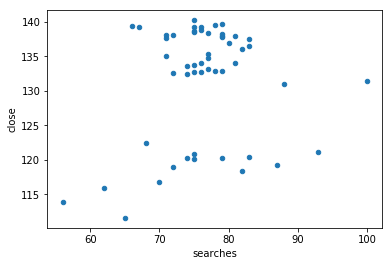

In [24]:
IBM.plot.scatter(x = "searches", y = "close")

In [25]:
np.corrcoef(IBM["searches"], IBM["close"])

array([[ 1., nan],
       [nan, nan]])

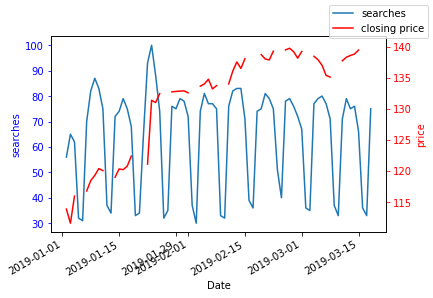

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax1 = plt.subplots()
plt.figure()
ax1.plot(IBM["searches"])
ax1.set_xlabel("Date")
ax1.set_ylabel("searches", color = "b")
ax1.tick_params("y", colors = "b")

ax2 = ax1.twinx()
ax2.plot(IBM["close"], "r")  #Plotting closing price as red.
ax2.set_ylabel("price", color = "r")
ax2.tick_params("y", colors = "r")

fig.autofmt_xdate()

fig.legend(("searches", "closing price"))
plt.show()

In [29]:
USbond = pd.read_csv("United States 10-Year Bond Yield Historical Data.csv")

In [ ]:
# not conclusive, but it seem like, after the searches goes up, the prices goes up steadily 
# aswell for a while. (the searches can be seen as a shock to the price, and it takes a while for the price to find a new level)
# the investors might be unsure wheter the increase will continue, and therefore wait some time before investing.

In [30]:
USbond.head()

,Date,Price,Open,High,Low,Change %
0,"Mar 18, 2019",2.605,2.594,2.611,2.585,0.41%
1,"Mar 17, 2019",2.594,2.592,2.594,2.592,0.13%
2,"Mar 15, 2019",2.591,2.628,2.638,2.580,-1.48%
3,"Mar 14, 2019",2.630,2.621,2.645,2.611,0.19%
4,"Mar 13, 2019",2.625,2.607,2.628,2.605,0.96%


In [35]:
# The dates are in a different order

In [42]:
US_bond = USbond.sort_index(axis=0, level =None, ascending = False)

In [52]:
US_bond

,Date,Price,Open,High,Low,Change %
62,"Jan 02, 2019",2.633,2.686,2.697,2.622,-1.97%
61,"Jan 03, 2019",2.552,2.618,2.656,2.545,-3.08%
60,"Jan 04, 2019",2.668,2.564,2.678,2.543,4.55%
59,"Jan 06, 2019",2.668,2.668,2.668,2.668,0.00%
58,"Jan 07, 2019",2.698,2.666,2.701,2.632,1.14%
57,"Jan 08, 2019",2.730,2.692,2.733,2.687,1.19%
56,"Jan 09, 2019",2.712,2.730,2.747,2.710,-0.66%
55,"Jan 10, 2019",2.746,2.710,2.747,2.678,1.25%
54,"Jan 11, 2019",2.699,2.731,2.740,2.681,-1.71%
53,"Jan 13, 2019",2.699,2.699,2.699,2.699,0.00%


In [51]:
IBM["open"]

date
2019-01-02    110.7200
2019-01-03    113.2110
2019-01-04    113.5866
2019-01-05         NaN
2019-01-06         NaN
2019-01-07    116.1468
2019-01-08    118.2819
2019-01-09    119.5175
2019-01-10    118.6970
2019-01-11    120.1798
2019-01-12         NaN
2019-01-13         NaN
2019-01-14    119.1221
2019-01-15    119.5669
2019-01-16    120.1798
2019-01-17    119.1715
2019-01-18    121.8503
2019-01-19         NaN
2019-01-20         NaN
2019-01-21         NaN
2019-01-22    121.8800
2019-01-23    129.8570
2019-01-24    131.1025
2019-01-25    131.3397
2019-01-26         NaN
2019-01-27         NaN
2019-01-28    131.5671
2019-01-29    132.7434
2019-01-30    132.4567
2019-01-31    132.9015
                ...   
2019-02-17         NaN
2019-02-18         NaN
2019-02-19    137.8100
2019-02-20    138.7600
2019-02-21    137.8200
2019-02-22    138.7300
2019-02-23         NaN
2019-02-24         NaN
2019-02-25    140.0000
2019-02-26    139.6700
2019-02-27    139.2500
2019-02-28    138.7700
2019-0

In [47]:
US_bond["Price"]

62    2.633
61    2.552
60    2.668
59    2.668
58    2.698
57    2.730
56    2.712
55    2.746
54    2.699
53    2.699
52    2.706
51    2.718
50    2.727
49    2.750
48    2.788
47    2.773
46    2.741
45    2.750
44    2.716
43    2.759
42    2.755
41    2.748
40    2.710
39    2.678
38    2.633
37    2.684
36    2.691
35    2.725
34    2.704
33    2.700
      ...  
29    2.654
28    2.686
27    2.709
26    2.655
25    2.664
24    2.673
23    2.636
22    2.648
21    2.695
20    2.654
19    2.666
18    2.668
17    2.638
16    2.686
15    2.717
14    2.759
13    2.766
12    2.724
11    2.719
10    2.693
9     2.641
8     2.630
7     2.630
6     2.641
5     2.600
4     2.625
3     2.630
2     2.591
1     2.594
0     2.605
Name: Price, Length: 63, dtype: float64

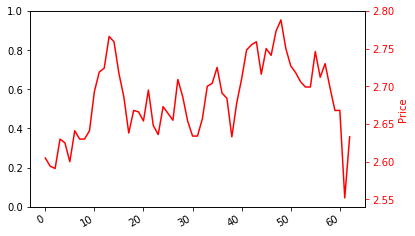

<Figure size 432x288 with 0 Axes>

In [49]:
fig, ax1 = plt.subplots()
plt.figure()
ax2 = ax1.twinx()
ax2.plot(US_bond["Price"], "r")  #Plotting closing price as red.
ax2.set_ylabel("Price", color = "r")
ax2.tick_params("y", colors = "r")

fig.autofmt_xdate()
plt.show()

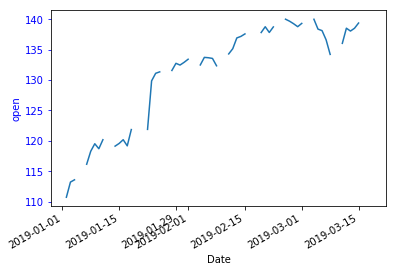

<Figure size 432x288 with 0 Axes>

In [50]:
fig, ax1= plt.subplots()
plt.figure()
ax1.plot(IBM["open"])
ax1.set_xlabel("Date")
ax1.set_ylabel("open", color = "b")
ax1.tick_params("y", colors = "b")
fig.autofmt_xdate()
plt.show()

In [53]:
#sæt de to figurer sammmen, men i stedet for IBM så find DOW jones eller S&P500

In [57]:
pandas_datareader.iex.market.MarketReader(symbols=None, start=None, end=None, retry_count=3, pause=0.001, session=None)

AttributeError: module 'pandas_datareader.iex' has no attribute 'market'